<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº5
#### Tobías Guerrero

## 1. Introducción

En este trabajo semanal, se busca estimar dos parámetros de una señal: su frecuencia y su amplitud.

Para esto, se generará una señal, definida por $x(k) = a_{1} \cdot sen(\Omega_{1} \cdot k) + n(k)$, siendo
 
- $\Omega_{1} = \Omega_{0} + f_{r} \cdot \frac{2\pi}{N}$, con $\Omega_{0} = \frac{\pi}{2}$

- $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2})$

- $n \sim \mathcal{N}(0, \, \sigma ^2)$

Se propone evaluar los siguientes estimadores para las magnitudes buscadas:
- $\hat{a_{1}} = \lvert X(\Omega) \rvert = \lvert \mathcal{F\{x(k)\}} \rvert$

- $\hat{\Omega_{1}} = \mathop{arg\ max}_{\Omega} \{ \lvert X(\Omega) \rvert \}$

Para esto, se pide considerar 200 realizaciones de la señal de 1000 muestras. Además, se pide parametrizar para relaciones señal a ruido de 3 y 10dB, visualizando los resultados para ambos valores en un mismo histograma.

## 2. Resolución

In [1]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Función para generar la señal, desarrollada en la TS1
def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , (nn-1)/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

In [3]:
# Variables para la generación de la señal
modo = "seno"
nn = 1000
fs = nn

In [4]:
# Variables para la resolución de la consigna

omega = nn / 4
a = 2
realizaciones = 200
snr1 = 10 # dB

# Cálculo de la potencia de ruido a partir de la SNR
Ps = (a**2) / 2
Pr = Ps / 10**(snr1/10)

# Se genera una matriz de 200 vectores de 1000 muestras
s1 = np.zeros((realizaciones,nn))

In [5]:
# Bucle para generar las 200 realizaciones
for i in range(realizaciones):
    fr = np.random.uniform(-0.5 , 0.5) * fs / nn
    t , sr = mifuncion( modo = modo , vmax = a , ff = omega + fr , nn = nn , fs = fs )
    r = np.random.normal(0, Pr, nn)
    s1[i] = sr + r

In [6]:
# A partir de las señales generadas, se calcula la FFT y se obtiene su módulo
S1 = np.fft.fft(s1,axis = 1) / nn
S1_mod = np.abs(S1)

# Para el estimador de la amplitud, se obtiene el vector columna correspondiente a la frecuencia definida, N/4. De este vector, se calcula la media. Con esta media, se calcula el sesgo
a1_est = S1_mod[:, int(nn / 4)] * 2
a1_est_media = np.mean(a1_est)
sesgo_a1 = np.abs(a - a1_est_media)

# Para el estimador de la frecuenca, se obtiene el índice para el cual se da la máxima amplitud en la FFT.
# La FFT está centrada en fs/2 en lugar de en 0. Por ende, se tiene una componente en 250 (correspondiente a -250) y otra en 750 (correspondiente a 250).
# Para corregir esto, se resta fs/2 al resultado de np.argmax y a eso se aplica el módulo.
# Finalmente, se calculan la media y el sesgo al igual que para la amplitud.
omega1 = np.abs(np.argmax(S1_mod,axis = 1) - fs/2)
omega1_est_media = np.mean(omega1)
sesgo_omega1 = np.abs(omega - omega1_est_media)

print("Para una SNR de 10dB, se obtuvo a través de los estimadores utilizados una amplitud de %f, con un sesgo de %f, y una frecuencia de %f, con un sesgo de %f." %(a1_est_media,sesgo_a1,omega1_est_media,sesgo_omega1))

Para una SNR de 10dB, se obtuvo a través de los estimadores utilizados una amplitud de 1.739262, con un sesgo de 0.260738, y una frecuencia de 249.995000, con un sesgo de 0.005000.


In [7]:
# Se repite el proceso para una SNR = 3dB
snr2 = 3 # dB

Pr = Ps / 10**(snr2/10)

s2 = np.zeros((realizaciones,nn))

for i in range(realizaciones):
    fr = np.random.uniform(-0.5 , 0.5) * fs / nn
    t , sr = mifuncion( modo = modo , vmax = a , ff = omega + fr , nn = nn , fs = fs )
    r = np.random.normal(0, Pr, nn)
    s2[i] = sr + r

S2 = np.fft.fft(s2,axis = 1) / nn
S2_mod = np.abs(S2)

a2_est = S2_mod[:, int(nn / 4)] * 2
a2_est_media = np.mean(a2_est)
sesgo_a2 = np.abs(a - a2_est_media)

omega2 = np.abs(np.argmax(S2_mod,axis = 1) - fs/2)
omega2_est_media = np.mean(omega2)
sesgo_omega2 = np.abs(omega - omega2_est_media)

print("Para una SNR de 3dB, se obtuvo a través de los estimadores utilizados una amplitud de %f, con un sesgo de %f, y una frecuencia de %f, con un sesgo de %f." %(a2_est_media,sesgo_a2,omega2_est_media,sesgo_omega2))

Para una SNR de 3dB, se obtuvo a través de los estimadores utilizados una amplitud de 1.744192, con un sesgo de 0.255808, y una frecuencia de 249.990000, con un sesgo de 0.010000.


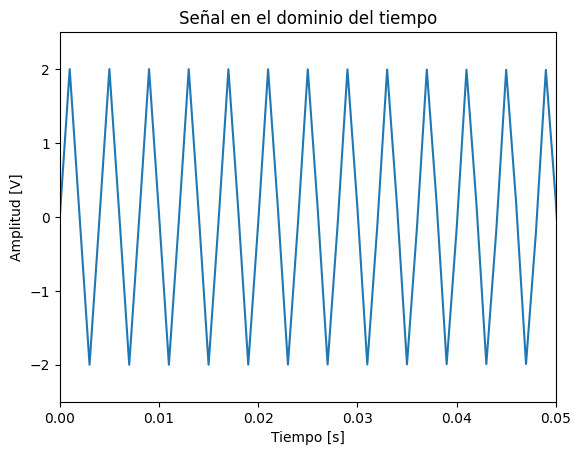

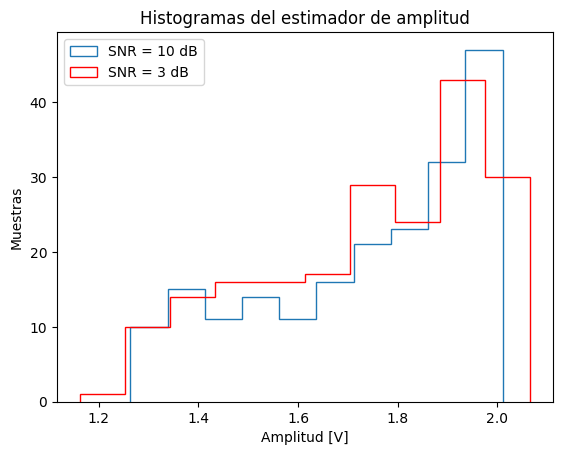

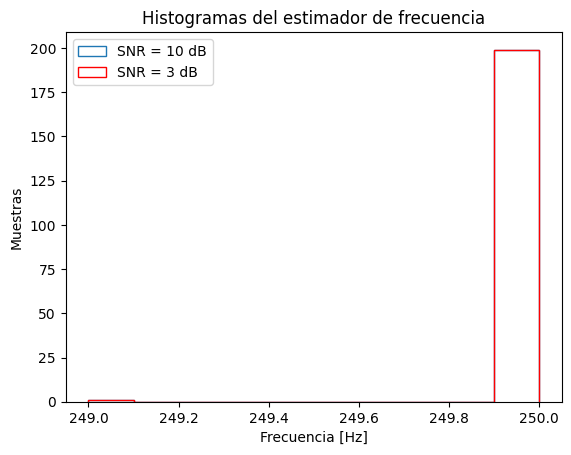

In [8]:
# Gráficos

plt.plot(t,sr)
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.xlim(0 , 0.05)
plt.ylim(-2.5 , 2.5)

plt.figure()
plt.title("Histogramas del estimador de amplitud")
plt.xlabel("Amplitud [V]")
plt.ylabel("Muestras")
plt.hist(a1_est, bins = 10, histtype = 'step',label = 'SNR = 10 dB')
plt.hist(a2_est, bins = 10, histtype = 'step',color = 'red',label = 'SNR = 3 dB')
plt.legend(loc='upper left')

plt.figure()
plt.title("Histogramas del estimador de frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Muestras")
plt.hist(omega1, bins = 10, histtype = 'step',label = 'SNR = 10 dB')
plt.hist(omega1, bins = 10, histtype = 'step',color = 'red',label = 'SNR = 3 dB')
plt.legend(loc='upper left')

## 3. Conclusiones

A partir de la resolución, se pueden extraer varias conclusiones.

En lo que respecta a la frecuencia, no se observa que la SNR afecte el resultado del estimador. Esto es lógico si se tiene en cuenta que se está buscando la frecuencia para la cual se da el máximo valor de la FFT, que, siempre que el ruido esté por debajo de la señal, se dará en la frecuencia establecida. Además, para obtener la frecuencia se busca el índice en el vector que contiene la FFT, el cual será por definción entero, con lo cual cualquier fluctuación menor a la unidad se verá enmascarada. Por estos mismos motivos, el sesgo da nulo.

Por otro lado, el estimador de la amplitud sí presenta dispersión, la cual aumenta al disminuir la SNR, situación que también es esperable. En ambos casos de SNR evaluados, hay mayor cantidad de muestras con amplitud igual a la establecida. Para el caso de menor SNR, a pesar de seguir siendo el valor mayoritario, se dispersa más que en el caso de mayor SNR, dando como resultado una estimación un poco más alejada de la original, y por ende mayor sesgo. 